## support vector machine

乳腺癌检测问题

In [13]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
print(f"shape of x is: {x.shape}, positive examples: {y[y==1].shape[0]}, negative examples: {y[y==0].shape[0]}")

shape of x is: (569, 30), positive examples: 357, negative examples: 212


In [14]:
# 拆分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3)

In [15]:
 # 训练模型
from sklearn.svm import SVC
clf=SVC(C=1.0, kernel='rbf',gamma=0.1)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print(f"train score: {train_score}, test score: {test_score}")

train score: 1.0, test score: 0.6023391812865497


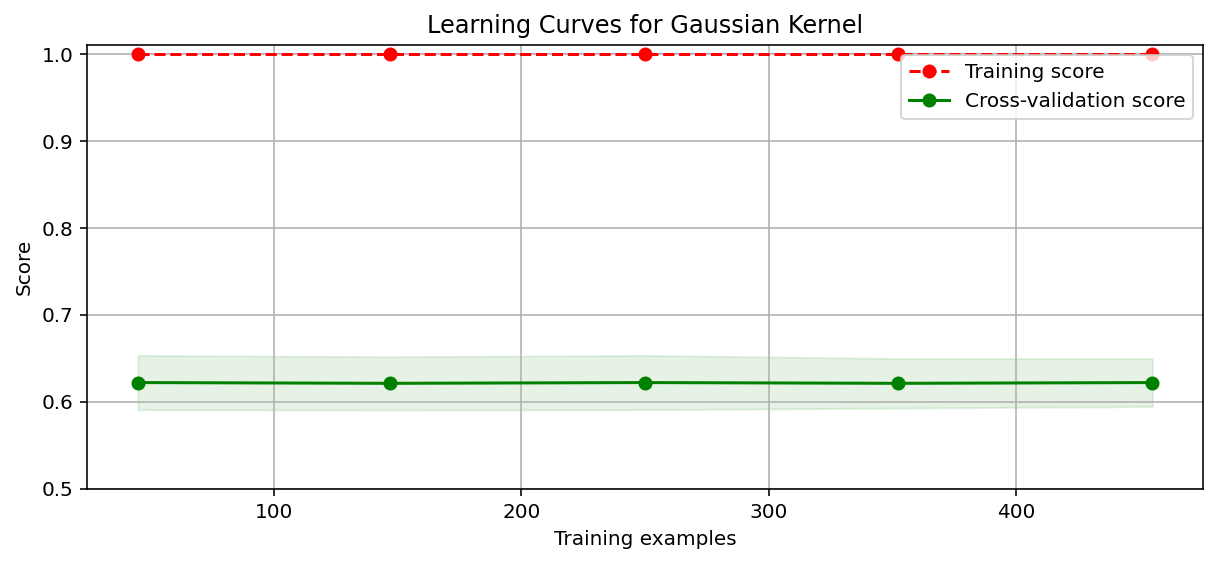

In [16]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = "Learning Curves for Gaussian Kernel"
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel="rbf", gamma=0.01), title, x, y, ylim=(0.5, 1.01), cv=cv)
plt.show()

In [17]:
from sklearn import datasets,svm,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
x=iris.data
y=iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
parameters={'kernel':('linear','rbf'),'C':[1,10,15]}
svc=svm.SVC(gamma='scale')
clf=GridSearchCV(svc,parameters,cv=5)
clf.fit(x_train,y_train)
print(f'训练的分数为：{clf.score(x_test,y_test)}')
print(clf.best_params_)
y_predict=clf.predict(x_test)
print(f"预测准确率为:{metrics.accuracy_score(y_test, y_predict)}")

训练的分数为：1.0
{'C': 10, 'kernel': 'rbf'}
预测准确率为:1.0


## 云南钾钠盐分类问题

In [20]:
import numpy as np
x_train_neo=np.array([[13.85,2.79,7.8,49.6],[22.31,4.67,12.31,47.8],[28.82,4.63,16.18,62.15],[15.29,3.54,7.58,43.2],[28.29,4.9,16.12,58.7],
                  [2.18,1.06,1.22,20.6],[3.85,0.8,4.06,47.1],[11.4,0,3.5,0],[3.66,2.42,2.14,15.1],[12.1,0,5.68,0]
                  ])
y_train_neo=np.array([1,1,1,1,1,0,0,0,0,0])
svc=svm.SVC(gamma='scale')
params={'kernel':('linear','rbf'),'C':[1,10,15,100]}
clf=GridSearchCV(svc,params,cv=5)
clf.fit(x_train_neo,y_train_neo)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 15, 100], 'kernel': ('linear', 'rbf')})

In [21]:
x_test_neo=np.array([[8.85,3.38,5.17,26.1],
                     [28.6,2.4,1.2,127],
                     [20.7,6.7,7.6,30.8],
                     [7.9,2.4,4.3,33.2],
                     [3.19,3.2,1.43,9.9],
                     [12.4,5.1,4.48,24.6]])
y_pred_neo=clf.predict(x_test_neo)
y_pred_neo,clf.best_params_

(array([0, 1, 1, 0, 0, 0]), {'C': 1, 'kernel': 'linear'})

根据结果可以认为，上述数据中，第二第三个为钾盐，其余为钠盐